# Introdução à biblioteca Matplotlib


O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB.

O matplotlib pode ser conceitualmente dividido em 3 partes:

* pylab: conjunto de funções disponíveis em matplotlib.pylab que permite a geração de código similar ao MATLAB.

* frontend ou API: conjunto de classes que realizam o trabalho pesado, criando as figuras, texto, linhas etc. Essa é uma interface abstrata que independe da saída.
        
* backends: conjunto de funções que dependem do dispositivo de saída (display). Por exemplo, PS para gráficos em PostScript, SVG gera gráficos em Scalable Vector Graphics, Agg cria figuras no formato PNG, GTK permite que os gráficos sejam incluídos em aplicações GTK+, e assim para PDF, WxWidgets, Tkinter, etc.

Fonte: http://matplotlib.org


O comando ```%matplotlib``` abaixo é uma "magic function" em IPython. 
De maneira resumida, este comando determina que os resultados devem ser apresentados em linha, diretamente abaixo da célula de código que produziu o gráfico, permitindo o armazenamento dentro do notebook.

In [1]:
%matplotlib inline

# Instalando a biblioteca matplotlib

In [2]:
! pip install matplotlib

# Usando matplolib


## puro OO

Mas antes, vamos gerar dados usando Numpy

In [3]:
import numpy as np
# Gerando dados aleatórios (seguindo a distribuição normal) usando numpy 
x = np.random.randn(1000)
y = np.random.randn(1000)

print(y.mean())
print(y.std())
print(y.min())
print(y.max())

0.005777375145805476
1.0004271356823007
-2.927801958863252
2.910975353499263


In [4]:
from matplotlib.backends.backend_agg import FigureCanvas
from matplotlib.figure import Figure

# definindo o tamanho da figura
fig = Figure(figsize=(5, 5))

# definindo qual canvas utilizar 
canvas = FigureCanvas(fig)

# Create a new Axes object using the subplot function from the Figure object
ax = fig.add_subplot(1,1,1) # "the three integers are R, C, and P in order, the subplot will take the Pth position on a grid with R rows and C columns"

In [5]:
# Pedimos uma distribuição normal, logo precisamos definir os intervalos de desvio padrão compatíveis ( quantos % da amostra estão em -2,2 ?)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4]) #use 100 para histogramas

#ax.hist(x, bins=50)
ax.scatter(x, y)

# adicionando um título ao gráfico
ax.set_title('Normally distributed data')

ax.yaxis.set_label_text("um label para y") #forma de acesso ao eixo interno
ax.set_xlabel("um label para x")

Text(0.5,0,'um label para x')

**Exibindo a imagem interativamente através do carregamento do blob da imagem gerada via IPython:**

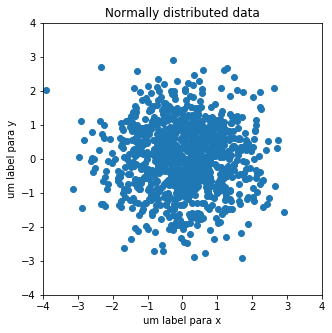

In [6]:
from IPython.display import display_png
display_png(fig);

## via Pylab

In [7]:
import matplotlib.pylab as pylab

x = pylab.linspace(0,1000,20) # numpy já vem no namespace
#print(x)

y = pylab.randn(20)
#print(y)

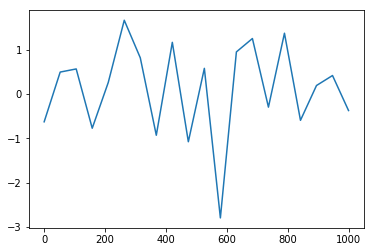

In [8]:
pylab.plot(x,y)
pylab.show()

## via Pyplot

In [9]:
import matplotlib.pyplot as plt

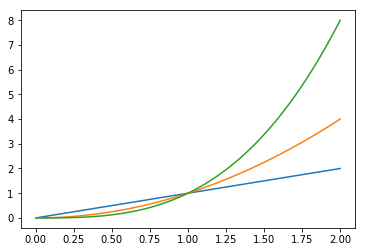

In [10]:
x = np.linspace(0, 2, 100)

plt.plot(x, x,    label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.show()

# Alternativas para criação de gráficos

Antes, vamos criar os pontos aleatórios

In [11]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

##  Alterando o estado do objeto + "flush" (modo script)

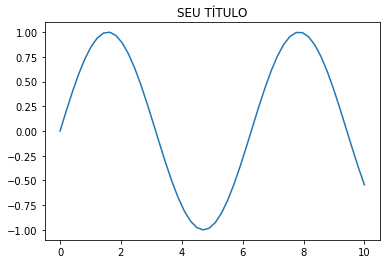

In [12]:
plt.plot(x, y)
plt.title('SEU TÍTULO')
plt.show()

In [22]:
fig, ax = plt.subplots(1,1) 
plt.close() # como se trata do modo inline, o gráfico não é exibido

## Usando subplots()

figtype: <class 'matplotlib.figure.Figure'>
axis_type: <class 'matplotlib.axes._subplots.AxesSubplot'>
plt_gca_id 139893877501176
axis_id 139893877501176


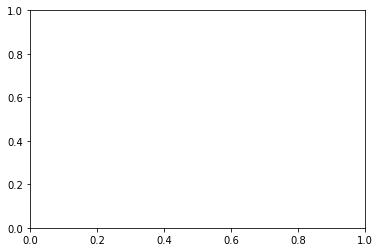

In [13]:
fig, ax = plt.subplots(1,1) # 1,1 - significa 1 linha e 1 coluna (ou seja, apenas um gráfico)

print('figtype:', type(fig))
print('axis_type:' , type(ax))
print('plt_gca_id', id(plt.gca())) 
print('axis_id', id(ax))


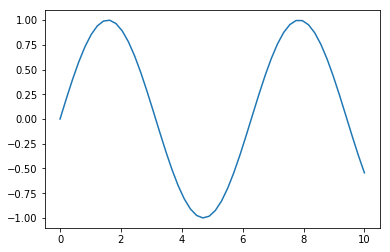

In [14]:
fig,ax = plt.subplots(1,1) # 1,1 - significa 1 linha e 1 coluna (ou seja, apenas um gráfico)

ax.plot(x, y)
plt.show()

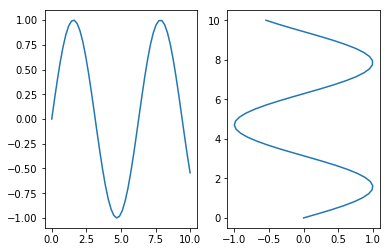

In [15]:
fig,ax = plt.subplots(1,2) # perceba que agora é retornado um vetor para fig e axes

ax[0].plot(x, y)
ax[1].plot(y, x)

plt.show() # "flush" no gráfico

# Elementos de um gráfico

![](https://matplotlib.org/_images/anatomy1.png)


## Título

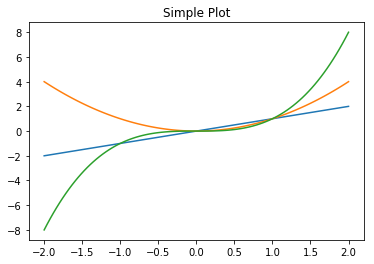

In [16]:
x = np.linspace(-2, 2, 100)

plt.plot(x, x,    label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.title("Simple Plot")

plt.show()

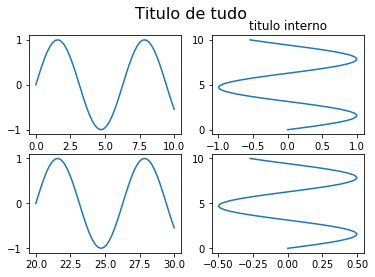

In [17]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

fig,ax = plt.subplots(2,2)
fig.suptitle('Titulo de tudo', fontsize=16)

ax[0][0].plot(x, y)
ax[0][1].set_title("titulo interno")
ax[0][1].plot(y, x)
ax[1][0].plot(x+20, y)
ax[1][1].plot(y/2, x)

plt.show() # faz um "flush" no gráfico

## Legendas

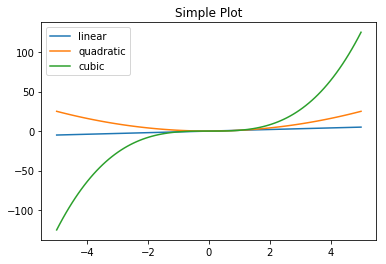

In [18]:
x = np.linspace(-5, 5, 100)

plt.plot(x, x,    label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.title("Simple Plot")

plt.legend()

plt.show()

## Thicks

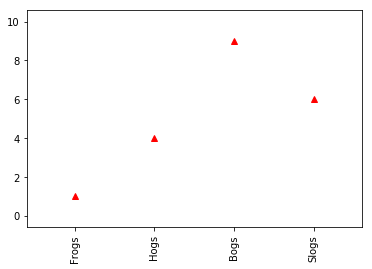

In [19]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'r^')
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.2)
plt.show()

## Rótulos

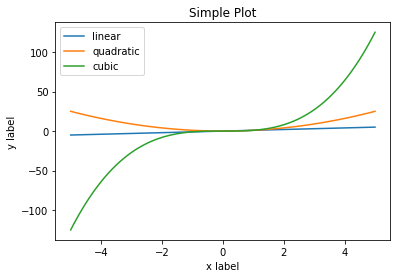

In [20]:
x = np.linspace(-5, 5, 100)

plt.plot(x, x,    label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

## Linhas e Marcadores

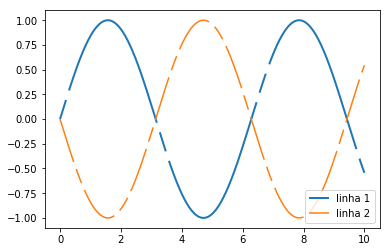

In [21]:
x = np.linspace(0, 10, 500)
y = np.sin(x)
dashes = [10, 5, 100, 5]  # personalizando as linhas: 10 pontos on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()

line1, = ax.plot(x, y, '--', linewidth=2,label='linha 1')
line1.set_dashes(dashes)

line2, = ax.plot(x, -1 * y , dashes=[30, 5, 10, 5], label='linha 2')

ax.legend(loc='lower right')

plt.show()

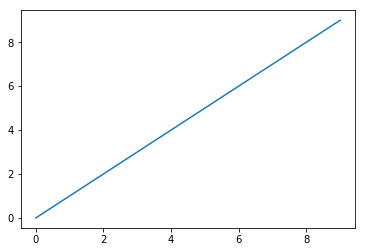

In [23]:
plt.plot(range(10))

# Outros tipos básicos de gráficos

## Gráfico em barras

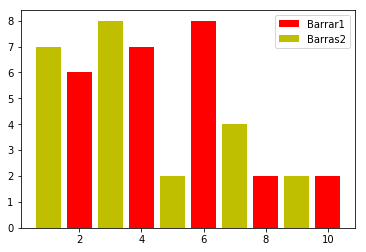

In [24]:
# Definindo variáveis
x = [2, 4, 6, 8, 10]
y = [6, 7, 8, 2, 2]
  
x2 = [1, 3, 5, 7, 9]
y2 = [7, 8, 2, 4, 2]

# Criando um gráfico
plt.bar(x, y,   label = 'Barrar1', color = 'r')
plt.bar(x2, y2, label = 'Barras2', color = 'y')
plt.legend()

plt.show()

## Gráfico pizza

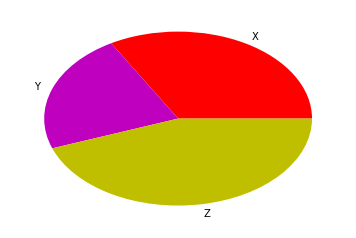

In [25]:
# Definindo variáveis
fatias = [6, 4, 8]
labels = ['X', 'Y', 'Z']
cores  = ['r', 'm', 'y']
 
plt.pie(fatias, labels = labels, colors = cores, shadow = False)
 
plt.show()

# Personalizando Gráficos

## Estilos pre estabelecidos

In [26]:
import matplotlib.pyplot as plt
print(plt.style.available)

['seaborn-deep', 'seaborn', 'seaborn-dark-palette', 'bmh', 'fast', 'seaborn-darkgrid', 'seaborn-bright', 'seaborn-talk', '_classic_test', 'seaborn-white', 'seaborn-notebook', 'seaborn-colorblind', 'grayscale', 'ggplot', 'seaborn-whitegrid', 'Solarize_Light2', 'seaborn-pastel', 'classic', 'seaborn-ticks', 'seaborn-poster', 'dark_background', 'fivethirtyeight', 'seaborn-paper', 'seaborn-muted', 'seaborn-dark', 'tableau-colorblind10']


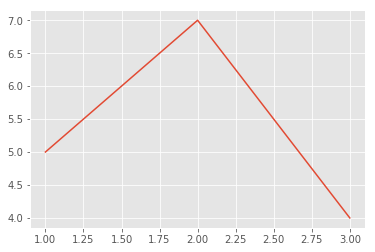

In [27]:
plt.style.use('ggplot')
plt.plot ([1,2,3],[5,7,4])
plt.show()

## Limites nos eixos, cores, estilos de linha, espessura da linha e marcadores

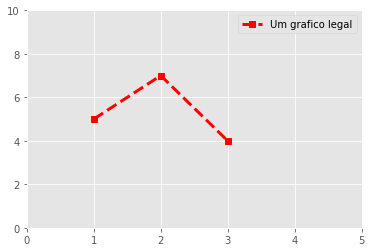

In [28]:
plt.style.use('ggplot')
plt.plot ([1,2,3],[5,7,4], linestyle='--', color='r', marker='s',  linewidth=3.0, label="Um grafico legal")
plt.axis([0,5,0,10])
plt.legend()
plt.show()

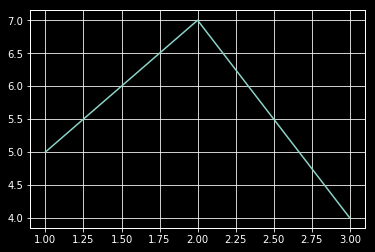

In [29]:
plt.style.use('dark_background')
plt.plot ([1,2,3],[5,7,4])
plt.show()

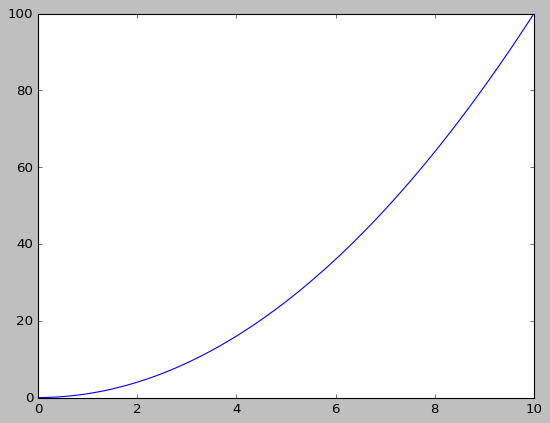

In [30]:
plt.style.use('classic')

x = np.linspace(0, 10, 100)

plt.plot(x, x**2)
plt.show()


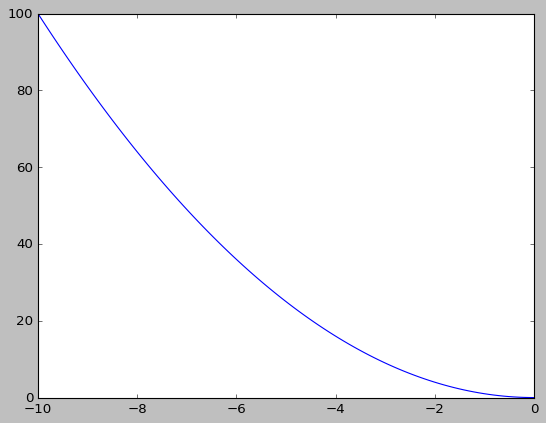

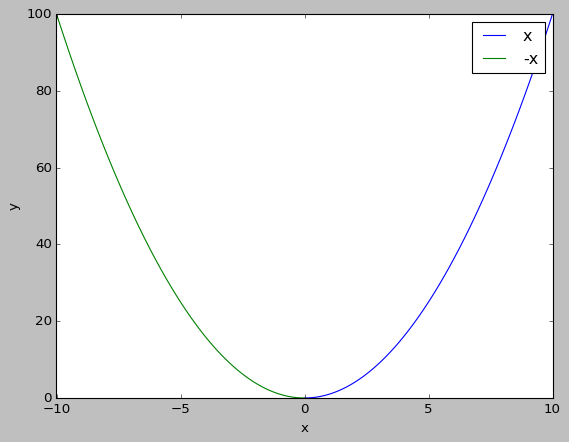

In [31]:
plt.plot(-x, x**2)
plt.show()

plt.ylabel("y")
plt.xlabel("x")

plt.plot(x, x**2,  label="x")
plt.plot(-x, x**2, label="-x")

plt.legend()
plt.show()

In [32]:
# Gerando dados (seguindo a normal, usualmente) usando a biblioteca NumPy
x = np.random.randn(1000)
y = np.random.randn(1000)

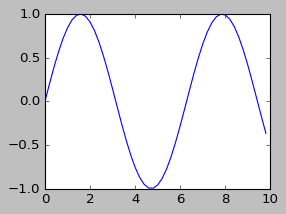

In [33]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(x, y)
plt.show()

# Combinando tipos de gráficos

# Outras Funcionalidades 

## Exportando para arquivos

In [34]:
#plt.savefig('nome_da_imagem.png')

In [35]:
plt.style.use('default')
